#vowels

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
data_path = Path('spectrograms_of_myanmar_pictures/vowel')

use 10% of training data as validation data

In [6]:
data = ImageDataBunch.from_folder(data_path, test='test', valid_pct=0.1, seed=42, bs=32)
data

ImageDataBunch;

Train: LabelList (1211 items)
x: ImageList
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
y: CategoryList
4,4,4,4,4
Path: spectrograms_of_myanmar_pictures/vowel;

Valid: LabelList (134 items)
x: ImageList
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
y: CategoryList
2,2,5,7,2
Path: spectrograms_of_myanmar_pictures/vowel;

Test: LabelList (120 items)
x: ImageList
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
y: EmptyLabelList
,,,,
Path: spectrograms_of_myanmar_pictures/vowel

use ResNet34 as pretrained model

In [7]:
learner = cnn_learner(data, base_arch=models.resnet34, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 175MB/s]


use LR finder to find the learning rate

In [8]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


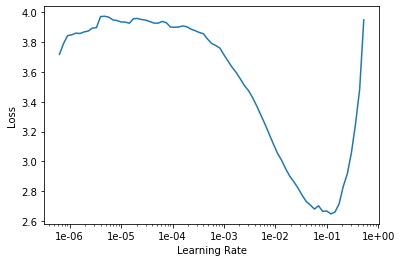

In [9]:
learner.recorder.plot()

use one cycle policy to train

In [11]:
learner.fit_one_cycle(10, max_lr=slice(1e-2, (1e-2)/2))

epoch,train_loss,valid_loss,accuracy,time
0,2.644338,1.616953,0.417910,00:16
1,1.341748,0.569146,0.753731,00:15
2,0.841824,1.130967,0.701493,00:15
3,0.553928,0.703362,0.820895,00:15
4,0.381008,0.242557,0.932836,00:15
5,0.229047,0.311933,0.947761,00:15
6,0.132336,0.235166,0.977612,00:15
7,0.079262,0.198886,0.970149,00:15
8,0.046866,0.205446,0.977612,00:15
9,0.028743,0.185472,0.977612,00:15


validation accuracy is about 97% and save the model

In [12]:
learner.save('stage-1', return_path=True)

PosixPath('spectrograms_of_myanmar_pictures/vowel/models/stage-1.pth')

In [13]:
learner.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (1211 items)
x: ImageList
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
y: CategoryList
4,4,4,4,4
Path: spectrograms_of_myanmar_pictures/vowel;

Valid: LabelList (134 items)
x: ImageList
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
y: CategoryList
2,2,5,7,2
Path: spectrograms_of_myanmar_pictures/vowel;

Test: LabelList (120 items)
x: ImageList
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
y: EmptyLabelList
,,,,
Path: spectrograms_of_myanmar_pictures/vowel, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (

In [14]:
interp = ClassificationInterpretation.from_learner(learner)

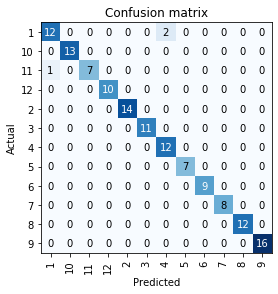

In [15]:
interp.plot_confusion_matrix()

using test set to get test accuracy

In [0]:
test_path = data_path/'test'

In [0]:
correct_count = 0
total = 0

In [0]:
classes = test_path.ls()

In [0]:
for _class in classes:
  correct_class = str(_class).split('/')[-1]
  images = [open_image(file_path) for file_path in _class.ls()]
  predictions = [learner.predict(img)[0].obj for img in images]
  total += len(predictions)
  correct_count += len(list(filter(lambda x: x == correct_class, predictions)))

In [20]:
total, correct_count

(120, 118)

In [21]:
print(f'open test accuracy : {(correct_count / total) * 100}%')

open test accuracy : 98.33333333333333%
